In [131]:
import pandas as pd
import numpy as np

In [132]:
def ff12(data):
    ff12 = []
    for i in range(len(data)):
        sic = data.iloc[i,13]
        if (100<=sic<=999) or (2000<=sic<=2399) or (2700<=sic<=2749) or (2770<=sic<=2799) or (3100<=sic<=3199) or (3940<=sic<=3989):
            ff = 1 # 1: Consumer NonDurables
        elif (2500<=sic<=2519) or (2590<=sic<=2599) or (3630<=sic<=3659) or (3710<=sic<=3711) or(3714<=sic<=3714) or (3716<=sic<=3716) or (3750<=sic<=3751) or (3792<=sic<=3792) or (3900<=sic<=3939) or (3990<=sic<=3999):
            ff = 2 # 2: Consumer Durables
        elif (2520<=sic<=2589) or (2600<=sic<=2699) or (2750<=sic<=2769) or (3000<=sic<=3099) or (3200<=sic<=3569) or (3580<=sic<=3629) or (3700<=sic<=3709) or (3712<=sic<=3713) or (3715<=sic<=3715) or (3717<=sic<=3749) or (3752<=sic<=3791) or (3793<=sic<=3799) or (3830<=sic<=3839) or (3860<=sic<=3899):
            ff = 3 # 3: Manufacturing
        elif (1200<=sic<=1399) or (2900<=sic<=2999):
            ff = 4 # 4: Energy
        elif (2800<=sic<=2829) or (2840<=sic<=2899):
            ff = 5 # 5: Chemistry
        elif (3570<=sic<=3579) or (3660<=sic<=3692) or (3694<=sic<=3699) or (3810<=sic<=3829) or (7370<=sic<=7379):
            ff = 6 # 6: Busness Equipment
        elif (4800<=sic<=4899):
            ff = 7 # 7: Telecom
        elif (4900<=sic<=4949):
            ff = 8 # 8: Utilities
        elif (5000<=sic<=5999) or (7200<=sic<=7299) or (7600<=sic<=7699):
            ff = 9 # 9: Wholesale & Retail
        elif (2830<=sic<=2839) or (3693<=sic<=3693) or (3840<=sic<=3859) or (8000<=sic<=8099):
            ff = 10 # 10: Healthcare
        elif 6000<=sic<=6999:
            ff = 11 # 11: Finance
        else:
            ff = 12 # 12: Other
        ff12.append(ff)
    data['ff12'] = ff12
    return(data)

In [133]:
def stadardize_zipcode(data):
    drop_lst = []
    for i in range(len(data)):
        zipcode = str(data.iloc[i,12])
        if zipcode == 0:
            zip = zipcode
            drop_lst.append(i)
        elif ' ' in zipcode:
            zip = zipcode
            drop_lst.append(i)
        elif len(zipcode) == 4:
            zip = '0' + zipcode
        elif len(zipcode) == 10:
            zip = zipcode.split('-')[0]
        elif len(zipcode) != 5:
            zip = zipcode
            drop_lst.append(i)
        elif len(zipcode) == 5:
            zip = zipcode
        data.iloc[i,12] = zip
    data = data.drop(drop_lst)
    data = data.reset_index()
    del data['index']
    return(data)

In [134]:
lati_longi = pd.read_csv('US.txt', sep = '\t', header = None)
lati_longi = lati_longi.fillna(0)
dict_long_lati = {}
for i in range(len(lati_longi)):
    zip = str(lati_longi.iloc[i,1])
    lati = lati_longi.iloc[i,9]
    longi = lati_longi.iloc[i,10]
    dict_long_lati[zip] = [lati,longi]

In [135]:
def latilong(data,dict_long_lati):
    latitude = []
    longitude = []
    for i in range(len(data)):
        zip = data.iloc[i,12]
        if zip in dict_long_lati:
            lati = dict_long_lati[zip][0]
            longi = dict_long_lati[zip][1]
        else:
            lati = 0
            longi = 0
        latitude.append(lati)
        longitude.append(longi)
    data['latitude'] = latitude
    data['longitude'] = longitude
    return(data)

## 1980s

In [136]:
df_1980 = pd.read_csv('1980s.csv')
df_1980.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,at,emp,revt,costat,addzip,sic,state
0,1001,19821231,1982.0,INDL,C,D,STD,USD,NaN,NaN,NaN,I,94104,5812,OK
1,1001,19831231,1983.0,INDL,C,D,STD,USD,14.080,1.386,25.395,I,94104,5812,OK
2,1001,19841231,1984.0,INDL,C,D,STD,USD,16.267,1.502,32.007,I,94104,5812,OK
3,1001,19851231,1985.0,INDL,C,D,STD,USD,39.495,4.080,53.798,I,94104,5812,OK
4,1003,19821231,1982.0,INDL,C,D,STD,USD,5.632,NaN,12.748,I,63125,5712,MO


In [137]:
df_1980 = ff12(df_1980)
df_1980 = stadardize_zipcode(df_1980)
df_1980 = latilong(df_1980,dict_long_lati)

In [138]:
df_1980 = df_1980.fillna(0)

In [139]:
df_1980

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,at,emp,revt,costat,addzip,sic,state,ff12,latitude,longitude
0,1001,19821231,1982.0,INDL,C,D,STD,USD,0.000,0.000,0.000,I,94104,5812,OK,9,37.7915,-122.4018
1,1001,19831231,1983.0,INDL,C,D,STD,USD,14.080,1.386,25.395,I,94104,5812,OK,9,37.7915,-122.4018
2,1001,19841231,1984.0,INDL,C,D,STD,USD,16.267,1.502,32.007,I,94104,5812,OK,9,37.7915,-122.4018
3,1001,19851231,1985.0,INDL,C,D,STD,USD,39.495,4.080,53.798,I,94104,5812,OK,9,37.7915,-122.4018
4,1003,19821231,1982.0,INDL,C,D,STD,USD,5.632,0.000,12.748,I,63125,5712,MO,9,38.5222,-90.3021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67027,145348,19851231,1985.0,INDL,C,D,STD,USD,6965.637,8.484,1976.501,A,18101,4911,PA,8,40.6026,-75.4691
67028,145348,19861231,1986.0,INDL,C,D,STD,USD,7139.066,8.446,2188.925,A,18101,4911,PA,8,40.6026,-75.4691
67029,145348,19871231,1987.0,INDL,C,D,STD,USD,7194.551,8.391,2088.758,A,18101,4911,PA,8,40.6026,-75.4691
67030,145348,19881231,1988.0,INDL,C,D,STD,USD,7524.645,8.376,2213.903,A,18101,4911,PA,8,40.6026,-75.4691


In [140]:
drop_lst=[]
for i in range(len(df_1980)):
    if (df_1980.iloc[i,8] == 0) or (df_1980.iloc[i,16]) == 0:
        drop_lst.append(i)
df_1980 = df_1980.drop(drop_lst)
df_1980 = df_1980.reset_index()
df_1980

,index,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,at,emp,revt,costat,addzip,sic,state,ff12,latitude,longitude
0,1,1001,19831231,1983.0,INDL,C,D,STD,USD,14.080,1.386,25.395,I,94104,5812,OK,9,37.7915,-122.4018
1,2,1001,19841231,1984.0,INDL,C,D,STD,USD,16.267,1.502,32.007,I,94104,5812,OK,9,37.7915,-122.4018
2,3,1001,19851231,1985.0,INDL,C,D,STD,USD,39.495,4.080,53.798,I,94104,5812,OK,9,37.7915,-122.4018
3,4,1003,19821231,1982.0,INDL,C,D,STD,USD,5.632,0.000,12.748,I,63125,5712,MO,9,38.5222,-90.3021
4,5,1003,19831231,1983.0,INDL,C,D,STD,USD,8.529,0.086,13.793,I,63125,5712,MO,9,38.5222,-90.3021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48685,67027,145348,19851231,1985.0,INDL,C,D,STD,USD,6965.637,8.484,1976.501,A,18101,4911,PA,8,40.6026,-75.4691
48686,67028,145348,19861231,1986.0,INDL,C,D,STD,USD,7139.066,8.446,2188.925,A,18101,4911,PA,8,40.6026,-75.4691
48687,67029,145348,19871231,1987.0,INDL,C,D,STD,USD,7194.551,8.391,2088.758,A,18101,4911,PA,8,40.6026,-75.4691
48688,67030,145348,19881231,1988.0,INDL,C,D,STD,USD,7524.645,8.376,2213.903,A,18101,4911,PA,8,40.6026,-75.4691


In [141]:
del df_1980['index']

### 1. Consumer Non Durables

In [142]:
df_1980_1 = df_1980[df_1980['ff12'] == 1]

In [143]:
X = []
for i in range(len(df_1980_1)):
    lat = df_1980_1.iloc[i,16]
    lon = df_1980_1.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [144]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1980_1['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

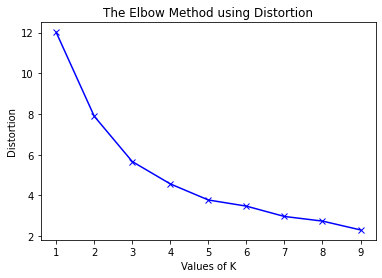

In [145]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

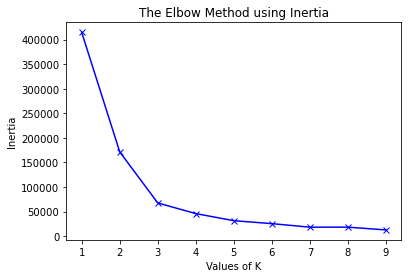

In [146]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [147]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X,sample_weight=df_1980_1['at'])
centers = kmeans.cluster_centers_

In [148]:
centers

array([[-116.29614869,   36.11810661],
       [ -76.72570762,   38.63354262],
       [ -89.19058633,   40.17149057]])

In [149]:
dict_ind = {}
cluster_center = []
for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '1'  


In [150]:
df_1980_1['label'] = kmeans.labels_
df_1980_1

<ipython-input-150-74fe169d4fb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1980_1['label'] = kmeans.labels_


,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,at,emp,revt,costat,addzip,sic,state,ff12,latitude,longitude,label
19,1006,19820630,1982.0,INDL,C,D,STD,USD,4.958,0.170,9.956,I,46590,2711,IN,1,41.2110,-85.8305,2
154,1040,19821231,1982.0,INDL,C,D,STD,USD,890.069,17.273,1054.218,I,23227,3949,VA,1,37.6247,-77.4351,1
155,1040,19831231,1983.0,INDL,C,D,STD,USD,911.640,18.738,970.519,I,23227,3949,VA,1,37.6247,-77.4351,1
156,1040,19841231,1984.0,INDL,C,D,STD,USD,939.445,18.684,1095.271,I,23227,3949,VA,1,37.6247,-77.4351,1
314,1091,19830331,1982.0,INDL,C,D,STD,USD,103.230,1.100,103.579,I,60065,2780,IL,1,42.1275,-87.8290,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48518,28701,19850930,1985.0,INDL,C,D,STD,USD,2637.299,70.400,5863.898,I,63164,2040,MO,1,38.6531,-90.2435,2
48519,28701,19860930,1986.0,INDL,C,D,STD,USD,4209.875,62.508,5514.598,I,63164,2040,MO,1,38.6531,-90.2435,2
48520,28701,19870930,1987.0,INDL,C,D,STD,USD,3863.699,58.298,5868.000,I,63164,2040,MO,1,38.6531,-90.2435,2
48521,28701,19880930,1988.0,INDL,C,D,STD,USD,4044.400,56.734,5875.895,I,63164,2040,MO,1,38.6531,-90.2435,2


### 2. Consumer Durables

In [151]:
df_1980_2 = df_1980[df_1980['ff12'] == 2]

In [152]:
X = []
for i in range(len(df_1980_2)):
    lat = df_1980_2.iloc[i,16]
    lon = df_1980_2.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [153]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1980_2['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

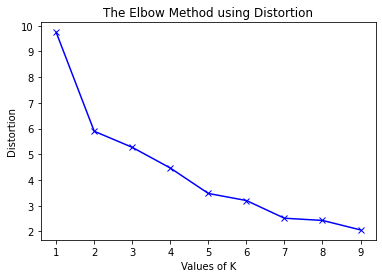

In [154]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

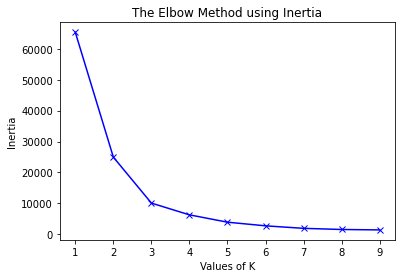

In [155]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [156]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X,sample_weight=df_1980_2['at'])
centers = kmeans.cluster_centers_

In [157]:
for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '2'  

In [158]:
df_1980_2['label'] = kmeans.labels_

<ipython-input-158-4e1ec117bbad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1980_2['label'] = kmeans.labels_


### 3. Manufacturing

In [159]:
df_1980_3 = df_1980[df_1980['ff12'] == 3]

In [160]:
X = []
for i in range(len(df_1980_3)):
    lat = df_1980_3.iloc[i,16]
    lon = df_1980_3.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [161]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1980_3['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

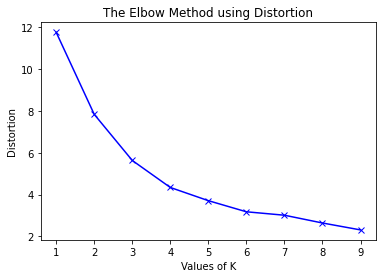

In [162]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

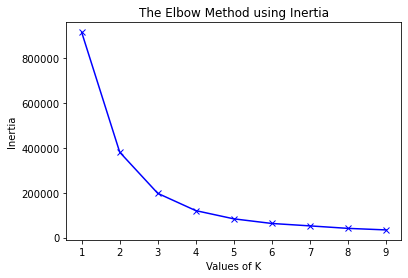

In [163]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [164]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X,sample_weight=df_1980_3['at'])
centers = kmeans.cluster_centers_

In [165]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '3'  

In [166]:
df_1980_3['label'] = kmeans.labels_

<ipython-input-166-b6bc159cb9e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1980_3['label'] = kmeans.labels_


### 4. Energy

In [167]:
df_1980_4 = df_1980[df_1980['ff12'] == 4]


In [168]:
X = []
for i in range(len(df_1980_4)):
    lat = df_1980_4.iloc[i,16]
    lon = df_1980_4.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [169]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1980_4['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

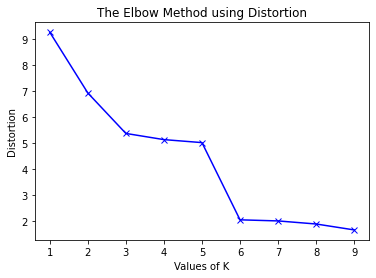

In [170]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

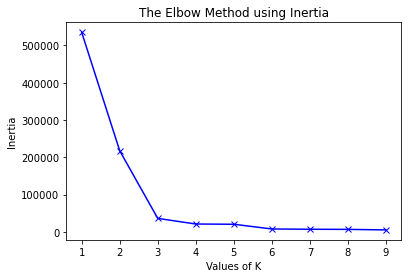

In [171]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [172]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X,sample_weight=df_1980_4['at'])
centers = kmeans.cluster_centers_

In [173]:
df_1980_4['label'] = kmeans.labels_

<ipython-input-173-e5bef8148c2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1980_4['label'] = kmeans.labels_


In [174]:
for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '4'  

### 5. Chemistry

In [175]:
df_1980_5 = df_1980[df_1980['ff12'] == 5]

In [176]:
X = []
for i in range(len(df_1980_5)):
    lat = df_1980_5.iloc[i,16]
    lon = df_1980_5.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [177]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1980_5['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

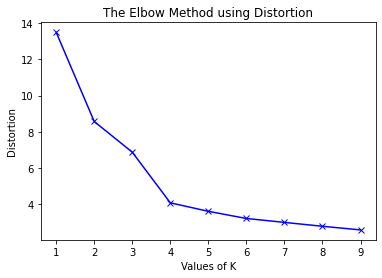

In [178]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

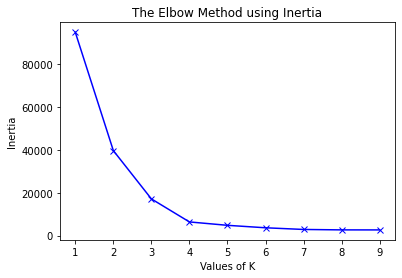

In [179]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [180]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X,sample_weight=df_1980_5['at'])
centers = kmeans.cluster_centers_

In [181]:
df_1980_5['label'] = kmeans.labels_

<ipython-input-181-9dfdf49abcf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1980_5['label'] = kmeans.labels_


In [182]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '5'  

### 6. Business Equipment

In [183]:
df_1980_6 = df_1980[df_1980['ff12'] == 6]

In [184]:
X = []
for i in range(len(df_1980_6)):
    lat = df_1980_6.iloc[i,16]
    lon = df_1980_6.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [185]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1980_6['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

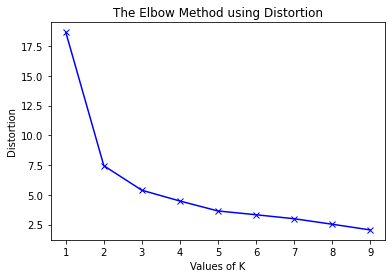

In [186]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

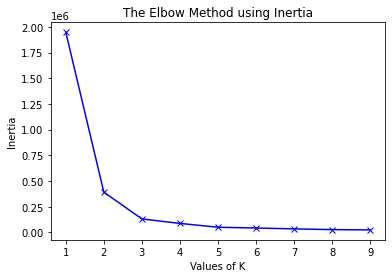

In [187]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [188]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X,sample_weight=df_1980_6['at'])
centers = kmeans.cluster_centers_

In [189]:
df_1980_6['label'] = kmeans.labels_

<ipython-input-189-e5219bc30af9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1980_6['label'] = kmeans.labels_


In [190]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '6'  

### 7. Telecom

In [191]:
df_1980_7 = df_1980[df_1980['ff12'] == 7]

In [192]:
X = []
for i in range(len(df_1980_7)):
    lat = df_1980_7.iloc[i,16]
    lon = df_1980_7.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [193]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1980_7['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

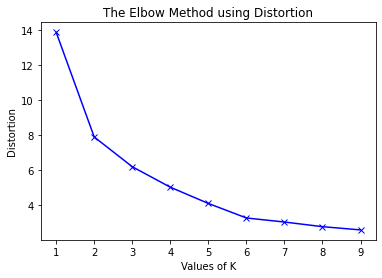

In [194]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

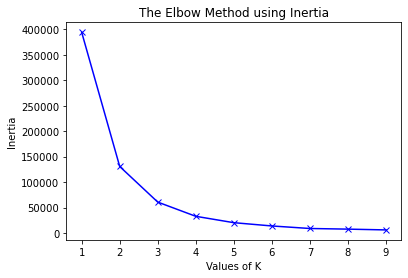

In [195]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [196]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X,sample_weight=df_1980_7['at'])
centers = kmeans.cluster_centers_

In [197]:
df_1980_7['label'] = kmeans.labels_

<ipython-input-197-307699c6a018>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1980_7['label'] = kmeans.labels_


In [198]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '7'  

### 8. Utilities

In [199]:
df_1980_8 = df_1980[df_1980['ff12'] == 8]


In [200]:
X = []
for i in range(len(df_1980_8)):
    lat = df_1980_8.iloc[i,16]
    lon = df_1980_8.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [201]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1980_8['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

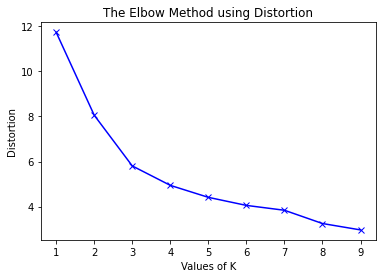

In [202]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

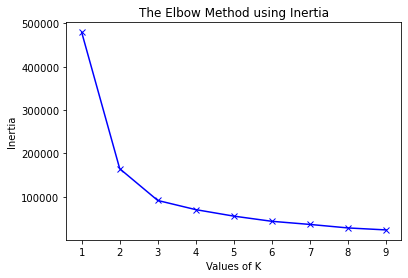

In [203]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [204]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X,sample_weight=df_1980_8['at'])
centers = kmeans.cluster_centers_

In [205]:
df_1980_8['label'] = kmeans.labels_

<ipython-input-205-a8cdf6bfcd1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1980_8['label'] = kmeans.labels_


In [206]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '8'  

### 9. Wholesale

In [207]:
df_1980_9 = df_1980[df_1980['ff12'] == 9]

In [208]:
X = []
for i in range(len(df_1980_9)):
    lat = df_1980_9.iloc[i,16]
    lon = df_1980_9.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [209]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1980_9['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

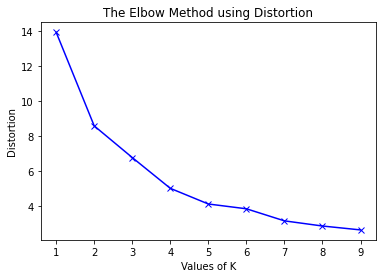

In [210]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

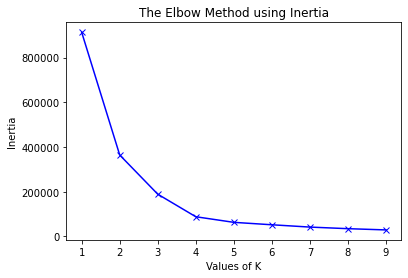

In [211]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [212]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X,sample_weight=df_1980_9['at'])
centers = kmeans.cluster_centers_

In [213]:
df_1980_9['label'] = kmeans.labels_

<ipython-input-213-9367f5caba70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1980_9['label'] = kmeans.labels_


In [214]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '9'  

### 10. Healthcare

In [215]:
df_1980_10 = df_1980[df_1980['ff12'] == 10]

In [216]:
X = []
for i in range(len(df_1980_10)):
    lat = df_1980_10.iloc[i,16]
    lon = df_1980_10.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [217]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1980_10['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

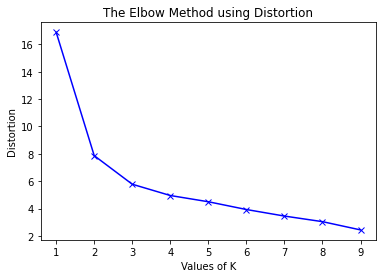

In [218]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

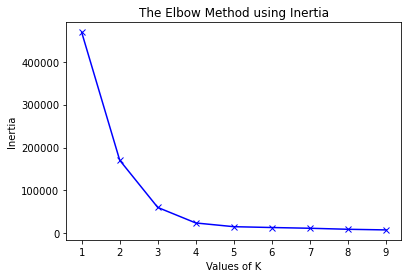

In [219]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [220]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X,sample_weight=df_1980_10['at'])
centers = kmeans.cluster_centers_

In [221]:
df_1980_10['label'] = kmeans.labels_

<ipython-input-221-5749ecd9b519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1980_10['label'] = kmeans.labels_


In [222]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '10'  

### 11. Finance

In [223]:
df_1980_11 = df_1980[df_1980['ff12'] == 11]

In [224]:
X = []
for i in range(len(df_1980_11)):
    lat = df_1980_11.iloc[i,16]
    lon = df_1980_11.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [225]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1980_11['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

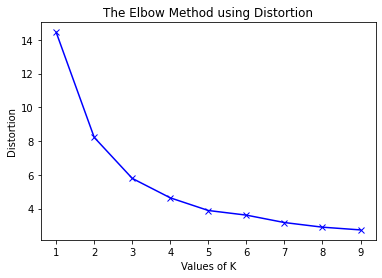

In [226]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

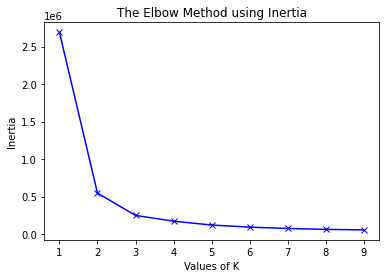

In [227]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [228]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X,sample_weight=df_1980_11['at'])
centers = kmeans.cluster_centers_

In [229]:
df_1980_11['label'] = kmeans.labels_

<ipython-input-229-a1bb62953707>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1980_11['label'] = kmeans.labels_


In [230]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '11'  

### 12. Others

In [231]:
df_1980_12 = df_1980[df_1980['ff12'] == 12]

In [232]:
X = []
for i in range(len(df_1980_12)):
    lat = df_1980_12.iloc[i,16]
    lon = df_1980_12.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [233]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1980_12['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

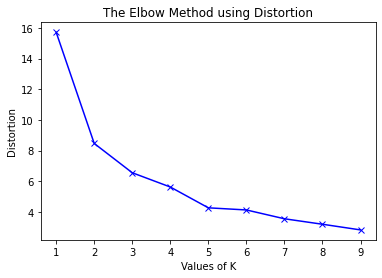

In [234]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

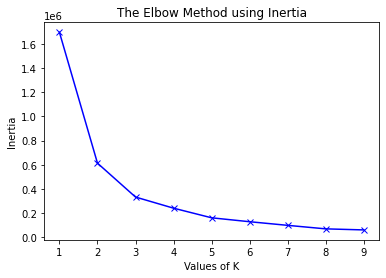

In [235]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [236]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X,sample_weight=df_1980_12['at'])
centers = kmeans.cluster_centers_

In [237]:
df_1980_12['label'] = kmeans.labels_

<ipython-input-237-3197f16d0c28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1980_12['label'] = kmeans.labels_


In [238]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '12'  

In [239]:
df_1980 = [df_1980_1, df_1980_2, df_1980_3,df_1980_4,df_1980_5,df_1980_6,df_1980_7,df_1980_8,df_1980_9,df_1980_10,df_1980_11,df_1980_12]
df_1980 = pd.concat(df_1980)
df_1980

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,at,emp,revt,costat,addzip,sic,state,ff12,latitude,longitude,label
19,1006,19820630,1982.0,INDL,C,D,STD,USD,4.958,0.170,9.956,I,46590,2711,IN,1,41.2110,-85.8305,2
154,1040,19821231,1982.0,INDL,C,D,STD,USD,890.069,17.273,1054.218,I,23227,3949,VA,1,37.6247,-77.4351,1
155,1040,19831231,1983.0,INDL,C,D,STD,USD,911.640,18.738,970.519,I,23227,3949,VA,1,37.6247,-77.4351,1
156,1040,19841231,1984.0,INDL,C,D,STD,USD,939.445,18.684,1095.271,I,23227,3949,VA,1,37.6247,-77.4351,1
314,1091,19830331,1982.0,INDL,C,D,STD,USD,103.230,1.100,103.579,I,60065,2780,IL,1,42.1275,-87.8290,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48513,28590,19881231,1988.0,INDL,C,D,STD,USD,992.007,14.400,1600.350,A,23226,7381,VA,12,37.5825,-77.5197,3
48514,28590,19891231,1989.0,INDL,C,D,STD,USD,984.216,14.600,1648.632,A,23226,7381,VA,12,37.5825,-77.5197,3
48524,28836,19890531,1988.0,INDL,C,D,STD,USD,8.066,0.008,3.092,A,90025,7011,CA,12,34.0447,-118.4487,2
48584,64344,19861231,1986.0,INDL,C,D,STD,USD,614.921,4.808,686.383,A,80021,7990,CO,12,39.8854,-105.1139,0


In [240]:
df_1980.to_csv('1980.csv', index = False)

In [241]:
lst = []
for i in cluster_center:
    for j in i:
        lst.append(j)
center_cluster_1980 = pd.DataFrame()
center_cluster_1980['long'] = [cor[0] for cor in lst]
center_cluster_1980['lati'] = [cor[1] for cor in lst]
industry = []
for long in center_cluster_1980['long']:
    ind = dict_ind[long]
    industry.append(ind)
center_cluster_1980['industry'] = industry

In [242]:
center_cluster_1980['year'] = '1980'
center_cluster_1980

,long,lati,industry,year
0,-116.296149,36.118107,1,1980
1,-76.725708,38.633543,1,1980
2,-89.190586,40.171491,1,1980
3,-116.296149,36.118107,1,1980
4,-76.725708,38.633543,1,1980
...,...,...,...,...
168,-97.323693,32.730842,12,1980
169,-82.523288,31.533428,12,1980
170,-119.164358,37.524911,12,1980
171,-75.753378,39.622059,12,1980


In [243]:
# import plotly
# tem = dict(
#     type = 'scattergeo',
#     locationmode = 'USA-states', 
#     mode = 'markers'
#     )

# data_1 = tem.copy()
# data_1['lon'] = center_cluster_1980[center_cluster_1980['industry']=='1']['long']
# data_1['lat'] = center_cluster_1980[center_cluster_1980['industry']=='1']['lati']
# data_1['marker'] = dict(color = 'red')
# data_1['name'] = 'Consumer NonDurables'

# data_2 = tem.copy()
# data_2['lon'] = center_cluster_1980[center_cluster_1980['industry']=='2']['long']
# data_2['lat'] = center_cluster_1980[center_cluster_1980['industry']=='2']['lati']
# data_2['marker'] = dict(color = 'brown')
# data_2['name'] = 'Consumer Durables'

# data_3 = tem.copy()
# data_3['lon'] = center_cluster_1980[center_cluster_1980['industry']=='3']['long']
# data_3['lat'] = center_cluster_1980[center_cluster_1980['industry']=='3']['lati']
# data_3['marker'] = dict(color = 'green')
# data_3['name'] = 'Manufacturing'

# data_4 = tem.copy()
# data_4['lon'] = center_cluster_1980[center_cluster_1980['industry']=='4']['long']
# data_4['lat'] = center_cluster_1980[center_cluster_1980['industry']=='4']['lati']
# data_4['marker'] = dict(color = 'yellow')
# data_4['name'] = 'Energy'

# data_5 = tem.copy()
# data_5['lon'] = center_cluster_1980[center_cluster_1980['industry']=='5']['long']
# data_5['lat'] = center_cluster_1980[center_cluster_1980['industry']=='5']['lati']
# data_5['marker'] = dict(color = 'violet')
# data_5['name'] = 'Chemistry'

# data_6 = tem.copy()
# data_6['lon'] = center_cluster_1980[center_cluster_1980['industry']=='6']['long']
# data_6['lat'] = center_cluster_1980[center_cluster_1980['industry']=='6']['lati']
# data_6['marker'] = dict(color = 'skyblue')
# data_6['name'] = 'Business Equipment'

# data_7 = tem.copy()
# data_7['lon'] = center_cluster_1980[center_cluster_1980['industry']=='7']['long']
# data_7['lat'] = center_cluster_1980[center_cluster_1980['industry']=='7']['lati']
# data_7['marker'] = dict(color = 'gray')
# data_7['name'] = 'Telecom'

# data_8 = tem.copy()
# data_8['lon'] = center_cluster_1980[center_cluster_1980['industry']=='8']['long']
# data_8['lat'] = center_cluster_1980[center_cluster_1980['industry']=='8']['lati']
# data_8['marker'] = dict(color = 'pink')
# data_8['name'] = 'Utilities'

# data_9 = tem.copy()
# data_9['lon'] = center_cluster_1980[center_cluster_1980['industry']=='9']['long']
# data_9['lat'] = center_cluster_1980[center_cluster_1980['industry']=='9']['lati']
# data_9['marker'] = dict(color = 'olive')
# data_9['name'] = 'Wholesale'

# data_10 = tem.copy()
# data_10['lon'] = center_cluster_1980[center_cluster_1980['industry']=='10']['long']
# data_10['lat'] = center_cluster_1980[center_cluster_1980['industry']=='10']['lati']
# data_10['marker'] = dict(color = 'orange')
# data_10['name'] = 'Healthcare'

# data_11 = tem.copy()
# data_11['lon'] = center_cluster_1980[center_cluster_1980['industry']=='11']['long']
# data_11['lat'] = center_cluster_1980[center_cluster_1980['industry']=='11']['lati']
# data_1['marker'] = dict(color = 'gold')
# data_11['name'] = 'Finance'

# data_12 = tem.copy()
# data_12['lon'] = center_cluster_1980[center_cluster_1980['industry']=='12']['long']
# data_12['lat'] = center_cluster_1980[center_cluster_1980['industry']=='12']['lati']
# data_12['marker'] = dict(color = 'yellowgreen')
# data_12['name'] = 'Others'

# layout = dict(
#         geo = dict(
#             scope = 'usa',
#             projection = dict(type='albers usa'),
#         ),
#     )

# fig = dict(data=[data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12], layout=layout)
# plotly.offline.plot(fig)

## 2000s

In [244]:
df_2000 = pd.read_csv('2000s.csv')
df_2000.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,at,emp,revt,costat,addzip,sic,state
0,1004,20010531,2000.0,INDL,C,D,STD,USD,701.854,2.5,874.255,A,60191,5080,IL
1,1004,20020531,2001.0,INDL,C,D,STD,USD,710.199,2.2,638.721,A,60191,5080,IL
2,1004,20030531,2002.0,INDL,C,D,STD,USD,686.621,2.1,606.337,A,60191,5080,IL
3,1004,20040531,2003.0,INDL,C,D,STD,USD,709.292,2.3,651.958,A,60191,5080,IL
4,1004,20050531,2004.0,INDL,C,D,STD,USD,732.230,2.6,747.848,A,60191,5080,IL


In [245]:
df_2000 = ff12(df_2000)
df_2000 = stadardize_zipcode(df_2000)
df_2000 = latilong(df_2000,dict_long_lati)

In [246]:
df_2000 = df_2000.fillna(0)

In [247]:
drop_lst=[]
for i in range(len(df_2000)):
    if (df_2000.iloc[i,8] == 0) or (df_2000.iloc[i,16]) == 0:
        drop_lst.append(i)
df_2000 = df_2000.drop(drop_lst)
df_2000 = df_2000.reset_index()
df_2000

,index,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,at,emp,revt,costat,addzip,sic,state,ff12,latitude,longitude
0,0,1004,20010531,2000.0,INDL,C,D,STD,USD,701.854,2.500,874.255,A,60191,5080,IL,9,41.9602,-87.9810
1,1,1004,20020531,2001.0,INDL,C,D,STD,USD,710.199,2.200,638.721,A,60191,5080,IL,9,41.9602,-87.9810
2,2,1004,20030531,2002.0,INDL,C,D,STD,USD,686.621,2.100,606.337,A,60191,5080,IL,9,41.9602,-87.9810
3,3,1004,20040531,2003.0,INDL,C,D,STD,USD,709.292,2.300,651.958,A,60191,5080,IL,9,41.9602,-87.9810
4,4,1004,20050531,2004.0,INDL,C,D,STD,USD,732.230,2.600,747.848,A,60191,5080,IL,9,41.9602,-87.9810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81730,109244,294524,20081231,2008.0,INDL,C,D,STD,USD,28651.000,0.000,50706.000,A,77010,2820,TX,5,29.7543,-95.3609
81731,109245,294524,20091231,2009.0,INDL,C,D,STD,USD,27761.000,14.680,30828.000,A,77010,2820,TX,5,29.7543,-95.3609
81732,109246,294524,20101231,2010.0,INDL,C,D,STD,USD,25494.000,14.000,41151.000,A,77010,2820,TX,5,29.7543,-95.3609
81733,109247,297209,20091231,2009.0,INDL,C,D,STD,USD,1087.291,0.029,0.000,A,77079,1381,TX,4,29.7738,-95.5980


In [248]:
del df_2000['index']


### 1. Consumer Non Durables

In [249]:
df_2000_1 = df_2000[df_2000['ff12'] == 1]

In [250]:
df_2000_1

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,at,emp,revt,costat,addzip,sic,state,ff12,latitude,longitude
156,1109,20001231,2000.0,INDL,C,D,STD,USD,6.330,0.043,7.824,I,33022,3944,FL,1,26.0134,-80.1442
157,1109,20011231,2001.0,INDL,C,D,STD,USD,6.397,0.051,8.172,I,33022,3944,FL,1,26.0134,-80.1442
158,1109,20021231,2002.0,INDL,C,D,STD,USD,5.364,0.021,6.429,I,33022,3944,FL,1,26.0134,-80.1442
159,1109,20031231,2003.0,INDL,C,D,STD,USD,5.378,0.028,8.218,I,33022,3944,FL,1,26.0134,-80.1442
160,1109,20041231,2004.0,INDL,C,D,STD,USD,7.925,0.031,9.109,I,33022,3944,FL,1,26.0134,-80.1442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81245,259837,20040331,2003.0,INDL,C,D,STD,USD,1497.476,2.363,515.672,I,33464,2721,FL,1,26.3587,-80.0831
81246,259837,20050331,2004.0,INDL,C,D,STD,USD,1470.521,2.181,536.621,I,33464,2721,FL,1,26.3587,-80.0831
81247,259837,20060331,2005.0,INDL,C,D,STD,USD,1289.314,1.421,496.167,I,33464,2721,FL,1,26.3587,-80.0831
81248,259837,20070331,2006.0,INDL,C,D,STD,USD,979.283,1.322,474.426,I,33464,2721,FL,1,26.3587,-80.0831


In [251]:
X = []
for i in range(len(df_2000_1)):
    lat = df_2000_1.iloc[i,16]
    lon = df_2000_1.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [252]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the mode
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_2000_1['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

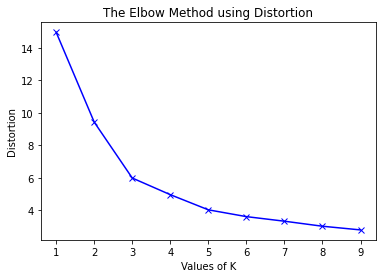

In [253]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

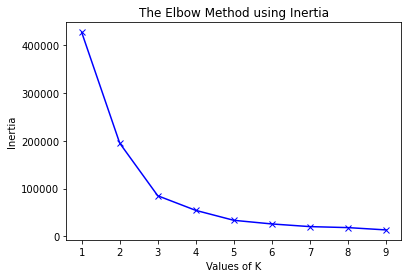

In [254]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [255]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X,sample_weight=df_2000_1['at'])
centers = kmeans.cluster_centers_

In [256]:
df_2000_1['label'] = kmeans.labels_

<ipython-input-256-325c1e203043>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_1['label'] = kmeans.labels_


In [257]:
dict_ind = {}
cluster_center = []
for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '1'  


### 2. Consumer Durables

In [258]:
df_2000_2 = df_2000[df_2000['ff12'] == 2]

In [259]:
X = []
for i in range(len(df_2000_2)):
    lat = df_2000_2.iloc[i,16]
    lon = df_2000_2.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [260]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_2000_2['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

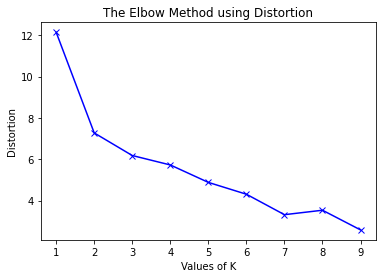

In [261]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

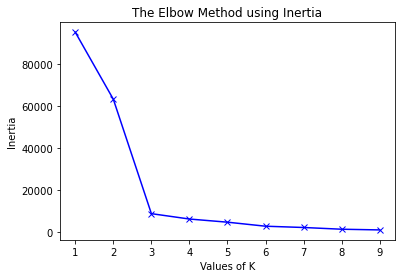

In [262]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [263]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X,sample_weight=df_2000_2['at'])
centers = kmeans.cluster_centers_

In [264]:
df_2000_2['label'] = kmeans.labels_

<ipython-input-264-c18b30bf7c2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_2['label'] = kmeans.labels_


In [265]:
for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '2'  

### 3. Manufacturing

In [266]:
df_2000_3 = df_2000[df_2000['ff12'] == 3]

In [267]:
X = []
for i in range(len(df_2000_3)):
    lat = df_2000_3.iloc[i,16]
    lon = df_2000_3.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [268]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_2000_3['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

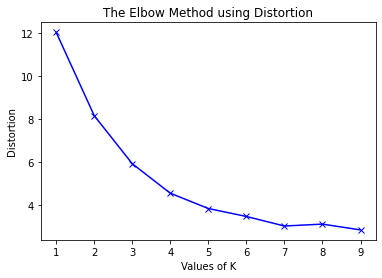

In [269]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

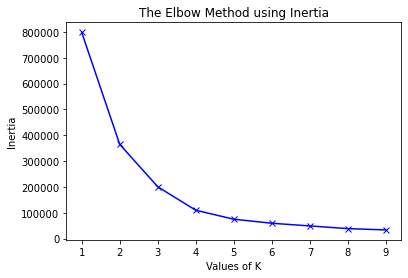

In [270]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [271]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X,sample_weight=df_2000_3['at'])
centers = kmeans.cluster_centers_

In [272]:
df_2000_3['label'] = kmeans.labels_

<ipython-input-272-94160bfe85eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_3['label'] = kmeans.labels_


In [273]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '3'  

### 4. Energy

In [274]:
df_2000_4 = df_2000[df_2000['ff12'] == 4]


In [275]:
X = []
for i in range(len(df_2000_4)):
    lat = df_2000_4.iloc[i,16]
    lon = df_2000_4.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [276]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_2000_4['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

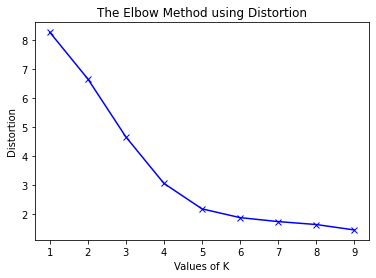

In [277]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

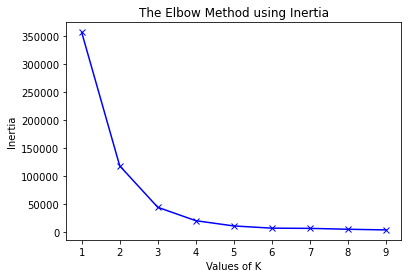

In [278]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [279]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X,sample_weight=df_2000_4['at'])
centers = kmeans.cluster_centers_

In [280]:
df_2000_4['label'] = kmeans.labels_

<ipython-input-280-c8aff0a34efe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_4['label'] = kmeans.labels_


In [281]:
for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '4'  

### 5. Chemistry

In [282]:
df_2000_5 = df_2000[df_2000['ff12'] == 5]

In [283]:
X = []
for i in range(len(df_2000_5)):
    lat = df_2000_5.iloc[i,16]
    lon = df_2000_5.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [284]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_2000_5['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

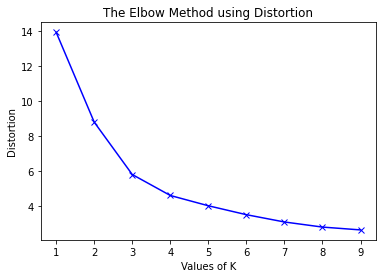

In [285]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

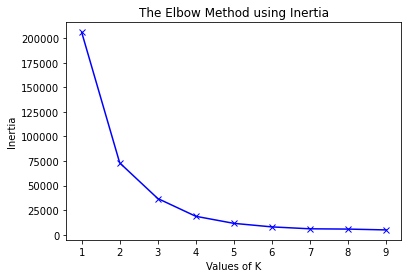

In [286]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [287]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X,sample_weight=df_2000_5['at'])
centers = kmeans.cluster_centers_

In [288]:
df_2000_5['label'] = kmeans.labels_

<ipython-input-288-b04946d1b71e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_5['label'] = kmeans.labels_


In [289]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '5'  

### 6. Business Equipment

In [290]:
df_2000_6 = df_2000[df_2000['ff12'] == 6]

In [291]:
X = []
for i in range(len(df_2000_6)):
    lat = df_2000_6.iloc[i,16]
    lon = df_2000_6.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [292]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_2000_6['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

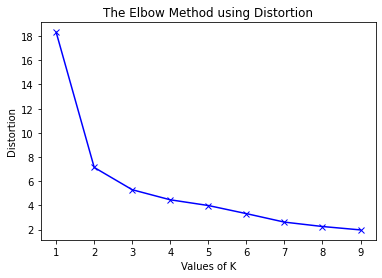

In [293]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

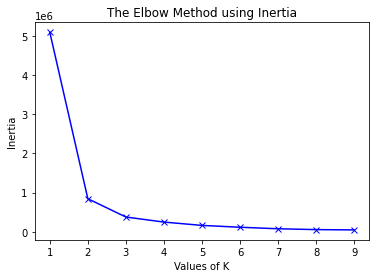

In [294]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [295]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X,sample_weight=df_2000_6['at'])
centers = kmeans.cluster_centers_

In [296]:
df_2000_6['label'] = kmeans.labels_

<ipython-input-296-ad00d2696932>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_6['label'] = kmeans.labels_


In [297]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '6'  

### 7. Telecom

In [298]:
df_2000_7 = df_2000[df_2000['ff12'] == 7]

In [299]:
X = []
for i in range(len(df_2000_7)):
    lat = df_2000_7.iloc[i,16]
    lon = df_2000_7.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [300]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_2000_7['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

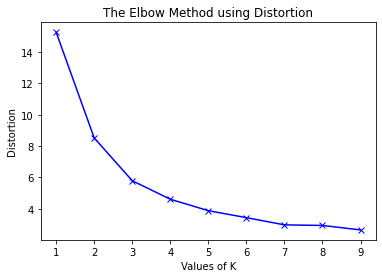

In [301]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

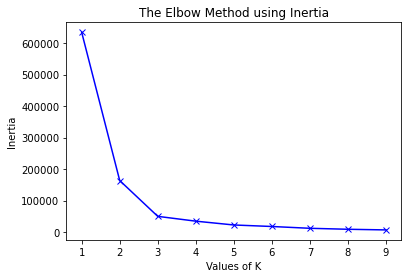

In [302]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [303]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X,sample_weight=df_2000_7['at'])
centers = kmeans.cluster_centers_

In [304]:
df_2000_7['label'] = kmeans.labels_

<ipython-input-304-55f5e3992bec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_7['label'] = kmeans.labels_


In [305]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '7'  

### 8. Utilities

In [306]:
df_2000_8 = df_2000[df_2000['ff12'] == 8]


In [307]:
X = []
for i in range(len(df_2000_8)):
    lat = df_2000_8.iloc[i,16]
    lon = df_2000_8.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [308]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_2000_8['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

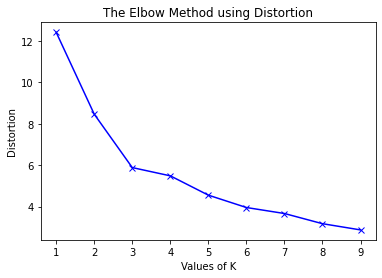

In [309]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

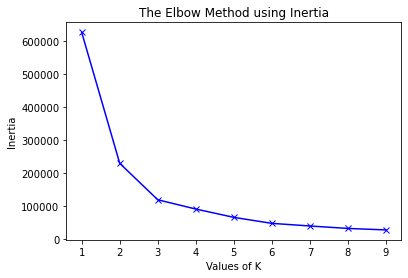

In [310]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [311]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X,sample_weight=df_2000_8['at'])
centers = kmeans.cluster_centers_

In [312]:
df_2000_8['label'] = kmeans.labels_

<ipython-input-312-644955b9d0ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_8['label'] = kmeans.labels_


In [313]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '8'  

### 9. Wholesale

In [314]:
df_2000_9 = df_2000[df_2000['ff12'] == 9]

In [315]:
X = []
for i in range(len(df_2000_9)):
    lat = df_2000_9.iloc[i,16]
    lon = df_2000_9.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [316]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_2000_9['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

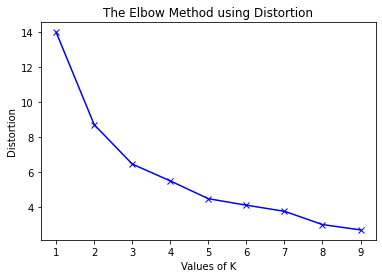

In [317]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

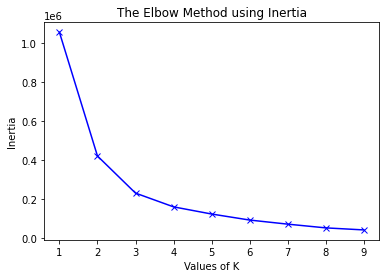

In [318]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [319]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X,sample_weight=df_2000_9['at'])
centers = kmeans.cluster_centers_

In [320]:
df_2000_9['label'] = kmeans.labels_

<ipython-input-320-04f3a5f6f972>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_9['label'] = kmeans.labels_


In [321]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '9'  

### 10. Healthcare

In [322]:
df_2000_10 = df_2000[df_2000['ff12'] == 10]

In [323]:
X = []
for i in range(len(df_2000_10)):
    lat = df_2000_10.iloc[i,16]
    lon = df_2000_10.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [324]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_2000_10['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

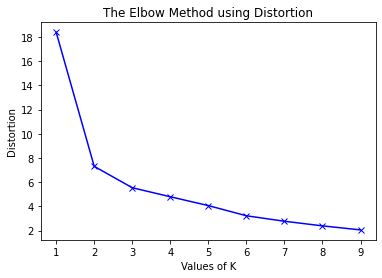

In [325]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

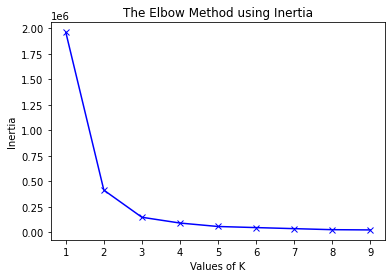

In [326]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [327]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X,sample_weight=df_2000_10['at'])
centers = kmeans.cluster_centers_

In [328]:
df_2000_10['label'] = kmeans.labels_

<ipython-input-328-1646360182c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_10['label'] = kmeans.labels_


In [329]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '10'  

### 11. Finance

In [330]:
df_2000_11 = df_2000[df_2000['ff12'] == 11]

In [331]:
X = []
for i in range(len(df_2000_11)):
    lat = df_2000_11.iloc[i,16]
    lon = df_2000_11.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [332]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_2000_11['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

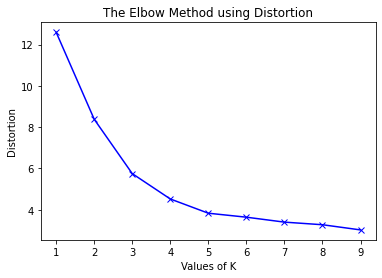

In [333]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

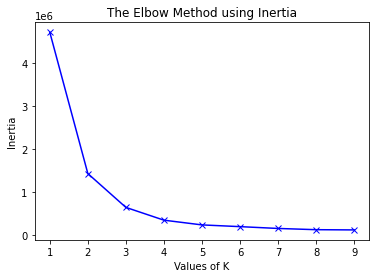

In [334]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [335]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X,sample_weight=df_2000_11['at'])
centers = kmeans.cluster_centers_

In [336]:
df_2000_11['label'] = kmeans.labels_

<ipython-input-336-818c9336e7f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_11['label'] = kmeans.labels_


In [337]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '11'  

### 12. Others

In [338]:
df_2000_12 = df_2000[df_2000['ff12'] == 12]

In [339]:
X = []
for i in range(len(df_2000_12)):
    lat = df_2000_12.iloc[i,16]
    lon = df_2000_12.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [340]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_2000_12['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

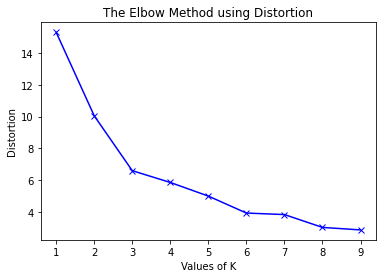

In [341]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

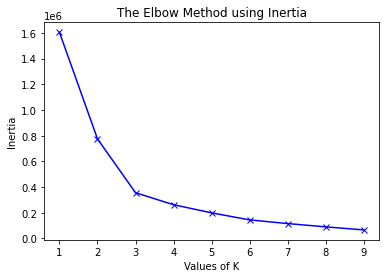

In [342]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [343]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X,sample_weight=df_2000_12['at'])
centers = kmeans.cluster_centers_

In [344]:
df_2000_12['label'] = kmeans.labels_

<ipython-input-344-de77cc9d0a5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_12['label'] = kmeans.labels_


In [345]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '12'  

In [346]:
df_2000 = [df_2000_1, df_2000_2, df_2000_3,df_2000_4,df_2000_5,df_2000_6,df_2000_7,df_2000_8,df_2000_9,df_2000_10,df_2000_11,df_2000_12]
df_2000 = pd.concat(df_2000)
df_2000

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,at,emp,revt,costat,addzip,sic,state,ff12,latitude,longitude,label
156,1109,20001231,2000.0,INDL,C,D,STD,USD,6.330,0.043,7.824,I,33022,3944,FL,1,26.0134,-80.1442,3
157,1109,20011231,2001.0,INDL,C,D,STD,USD,6.397,0.051,8.172,I,33022,3944,FL,1,26.0134,-80.1442,3
158,1109,20021231,2002.0,INDL,C,D,STD,USD,5.364,0.021,6.429,I,33022,3944,FL,1,26.0134,-80.1442,3
159,1109,20031231,2003.0,INDL,C,D,STD,USD,5.378,0.028,8.218,I,33022,3944,FL,1,26.0134,-80.1442,3
160,1109,20041231,2004.0,INDL,C,D,STD,USD,7.925,0.031,9.109,I,33022,3944,FL,1,26.0134,-80.1442,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81687,273902,20081231,2008.0,INDL,C,D,STD,CAD,468.808,0.000,74.505,I,60523,4991,IL,12,41.8371,-87.9638,1
81688,273902,20091231,2009.0,INDL,C,D,STD,CAD,377.836,0.001,60.111,I,60523,4991,IL,12,41.8371,-87.9638,1
81689,273902,20101231,2010.0,INDL,C,D,STD,CAD,329.365,0.001,61.290,I,60523,4991,IL,12,41.8371,-87.9638,1
81723,286253,20081231,2008.0,INDL,C,D,STD,USD,87.089,0.000,175.053,I,19034,8731,PA,12,40.1386,-75.2022,1


In [347]:
df_2000.to_csv('2000.csv',index = False)

In [348]:
lst = []
for i in cluster_center:
    for j in i:
        lst.append(j)
center_cluster_2000 = pd.DataFrame()
center_cluster_2000['long'] = [cor[0] for cor in lst]
center_cluster_2000['lati'] = [cor[1] for cor in lst]
industry = []
for long in center_cluster_2000['long']:
    ind = dict_ind[long]
    industry.append(ind)
center_cluster_2000['industry'] = industry

In [349]:
center_cluster_2000['year'] = '2000'
center_cluster_2000

,long,lati,industry,year
0,-75.963793,39.661682,1,2000
1,-120.247831,36.348162,1,2000
2,-88.932374,41.608648,1,2000
3,-82.897796,34.344369,1,2000
4,-98.171795,35.455741,1,2000
...,...,...,...,...
211,-117.341573,37.455409,12,2000
212,-81.870832,38.342278,12,2000
213,-95.828319,32.440802,12,2000
214,-81.054683,27.359720,12,2000


In [350]:
# import plotly
# tem = dict(
#     type = 'scattergeo',
#     locationmode = 'USA-states', 
#     mode = 'markers'
#     )

# data_1 = tem.copy()
# data_1['lon'] = center_cluster_2000[center_cluster_2000['industry']=='1']['long']
# data_1['lat'] = center_cluster_2000[center_cluster_2000['industry']=='1']['lati']
# data_1['marker'] = dict(color = 'red')
# data_1['name'] = 'Consumer NonDurables'

# data_2 = tem.copy()
# data_2['lon'] = center_cluster_2000[center_cluster_2000['industry']=='2']['long']
# data_2['lat'] = center_cluster_2000[center_cluster_2000['industry']=='2']['lati']
# data_2['marker'] = dict(color = 'brown')
# data_2['name'] = 'Consumer Durables'

# data_3 = tem.copy()
# data_3['lon'] = center_cluster_2000[center_cluster_2000['industry']=='3']['long']
# data_3['lat'] = center_cluster_2000[center_cluster_2000['industry']=='3']['lati']
# data_3['marker'] = dict(color = 'green')
# data_3['name'] = 'Manufacturing'

# data_4 = tem.copy()
# data_4['lon'] = center_cluster_2000[center_cluster_2000['industry']=='4']['long']
# data_4['lat'] = center_cluster_2000[center_cluster_2000['industry']=='4']['lati']
# data_4['marker'] = dict(color = 'yellow')
# data_4['name'] = 'Energy'

# data_5 = tem.copy()
# data_5['lon'] = center_cluster_2000[center_cluster_2000['industry']=='5']['long']
# data_5['lat'] = center_cluster_2000[center_cluster_2000['industry']=='5']['lati']
# data_5['marker'] = dict(color = 'violet')
# data_5['name'] = 'Chemistry'

# data_6 = tem.copy()
# data_6['lon'] = center_cluster_2000[center_cluster_2000['industry']=='6']['long']
# data_6['lat'] = center_cluster_2000[center_cluster_2000['industry']=='6']['lati']
# data_6['marker'] = dict(color = 'skyblue')
# data_6['name'] = 'Business Equipment'

# data_7 = tem.copy()
# data_7['lon'] = center_cluster_2000[center_cluster_2000['industry']=='7']['long']
# data_7['lat'] = center_cluster_2000[center_cluster_2000['industry']=='7']['lati']
# data_7['marker'] = dict(color = 'gray')
# data_7['name'] = 'Telecom'

# data_8 = tem.copy()
# data_8['lon'] = center_cluster_2000[center_cluster_2000['industry']=='8']['long']
# data_8['lat'] = center_cluster_2000[center_cluster_2000['industry']=='8']['lati']
# data_8['marker'] = dict(color = 'pink')
# data_8['name'] = 'Utilities'

# data_9 = tem.copy()
# data_9['lon'] = center_cluster_2000[center_cluster_2000['industry']=='9']['long']
# data_9['lat'] = center_cluster_2000[center_cluster_2000['industry']=='9']['lati']
# data_9['marker'] = dict(color = 'olive')
# data_9['name'] = 'Wholesale'

# data_10 = tem.copy()
# data_10['lon'] = center_cluster_2000[center_cluster_2000['industry']=='10']['long']
# data_10['lat'] = center_cluster_2000[center_cluster_2000['industry']=='10']['lati']
# data_10['marker'] = dict(color = 'orange')
# data_10['name'] = 'Healthcare'

# data_11 = tem.copy()
# data_11['lon'] = center_cluster_2000[center_cluster_2000['industry']=='11']['long']
# data_11['lat'] = center_cluster_2000[center_cluster_2000['industry']=='11']['lati']
# data_1['marker'] = dict(color = 'gold')
# data_11['name'] = 'Finance'

# data_12 = tem.copy()
# data_12['lon'] = center_cluster_1980[center_cluster_1980['industry']=='12']['long']
# data_12['lat'] = center_cluster_1980[center_cluster_1980['industry']=='12']['lati']
# data_12['marker'] = dict(color = 'yellowgreen')
# data_12['name'] = 'Others'

# layout = dict(
#         geo = dict(
#             scope = 'usa',
#             projection = dict(type='albers usa'),
#         ),
#     )

# fig = dict(data=[data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12], layout=layout)
# plotly.offline.plot(fig)

## 1990s

In [351]:
df_1990 = pd.read_csv('1990s.csv')
df_1990.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,at,emp,revt,costat,addzip,sic,state
0,1004,19910531,1990.0,INDL,C,D,STD,USD,379.958,2.035,466.542,A,60191,5080,IL
1,1004,19920531,1991.0,INDL,C,D,STD,USD,395.351,1.840,422.657,A,60191,5080,IL
2,1004,19930531,1992.0,INDL,C,D,STD,USD,365.151,1.780,382.780,A,60191,5080,IL
3,1004,19940531,1993.0,INDL,C,D,STD,USD,417.626,1.860,407.754,A,60191,5080,IL
4,1004,19950531,1994.0,INDL,C,D,STD,USD,425.814,1.940,451.395,A,60191,5080,IL


In [352]:
df_1990 = ff12(df_1990)
df_1990 = stadardize_zipcode(df_1990)
df_1990 = latilong(df_1990,dict_long_lati)

In [353]:
df_1990 = df_1990.fillna(0)

In [354]:
drop_lst=[]
for i in range(len(df_1990)):
    if (df_1990.iloc[i,8] == 0) or (df_1990.iloc[i,16]) == 0:
        drop_lst.append(i)
df_1990 = df_1990.drop(drop_lst)
df_1990 = df_1990.reset_index()
df_1990

,index,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,at,emp,revt,costat,addzip,sic,state,ff12,latitude,longitude
0,0,1004,19910531,1990.0,INDL,C,D,STD,USD,379.958,2.035,466.542,A,60191,5080,IL,9,41.9602,-87.9810
1,1,1004,19920531,1991.0,INDL,C,D,STD,USD,395.351,1.840,422.657,A,60191,5080,IL,9,41.9602,-87.9810
2,2,1004,19930531,1992.0,INDL,C,D,STD,USD,365.151,1.780,382.780,A,60191,5080,IL,9,41.9602,-87.9810
3,3,1004,19940531,1993.0,INDL,C,D,STD,USD,417.626,1.860,407.754,A,60191,5080,IL,9,41.9602,-87.9810
4,4,1004,19950531,1994.0,INDL,C,D,STD,USD,425.814,1.940,451.395,A,60191,5080,IL,9,41.9602,-87.9810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81179,111041,277918,19950731,1995.0,INDL,C,D,STD,USD,10.230,0.086,11.625,A,90503,3714,CA,2,33.8397,-118.3542
81180,111042,277918,19960731,1996.0,INDL,C,D,STD,USD,4.363,0.035,4.209,A,90503,3714,CA,2,33.8397,-118.3542
81181,111043,277918,19970731,1997.0,INDL,C,D,STD,USD,4.513,0.055,4.484,A,90503,3714,CA,2,33.8397,-118.3542
81182,111044,277918,19980731,1998.0,INDL,C,D,STD,USD,1.658,0.026,1.938,A,90503,3714,CA,2,33.8397,-118.3542


In [355]:
del df_1990['index']


### 1. Consumer Non Durables

In [356]:
df_1990_1 = df_1990[df_1990['ff12'] == 1]

In [357]:
df_1990_1

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,at,emp,revt,costat,addzip,sic,state,ff12,latitude,longitude
283,1109,19901231,1990.0,INDL,C,D,STD,USD,2.127,0.039,3.971,I,33022,3944,FL,1,26.0134,-80.1442
284,1109,19911231,1991.0,INDL,C,D,STD,USD,2.626,0.039,4.324,I,33022,3944,FL,1,26.0134,-80.1442
285,1109,19921231,1992.0,INDL,C,D,STD,USD,2.979,0.035,4.952,I,33022,3944,FL,1,26.0134,-80.1442
286,1109,19931231,1993.0,INDL,C,D,STD,USD,3.307,0.030,4.076,I,33022,3944,FL,1,26.0134,-80.1442
287,1109,19941231,1994.0,INDL,C,D,STD,USD,3.438,0.035,4.603,I,33022,3944,FL,1,26.0134,-80.1442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81168,221545,19971231,1997.0,INDL,C,D,STD,USD,591.574,0.000,545.853,A,38010,2015,0,1,35.2886,-89.4880
81169,221545,19981231,1998.0,INDL,C,D,STD,USD,611.065,10.806,538.945,A,38010,2015,0,1,35.2886,-89.4880
81170,221545,19991231,1999.0,INDL,C,D,STD,USD,949.168,11.215,595.241,A,38010,2015,0,1,35.2886,-89.4880
81171,222519,19981231,1998.0,INDL,C,D,STD,USD,1738.110,14.707,1394.111,A,66220,2040,0,1,38.9536,-94.7336


In [358]:
X = []
for i in range(len(df_1990_1)):
    lat = df_1990_1.iloc[i,16]
    lon = df_1990_1.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [359]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the mode
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1990_1['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

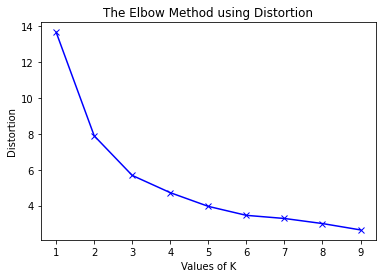

In [360]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

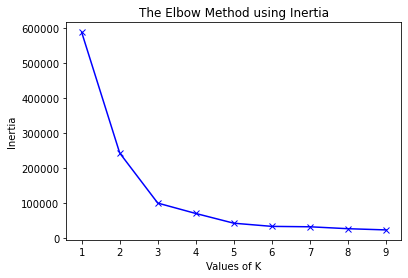

In [361]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [362]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X,sample_weight=df_1990_1['at'])
centers = kmeans.cluster_centers_

In [363]:
df_1990_1['label'] = kmeans.labels_

<ipython-input-363-ed1e4f52cd57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990_1['label'] = kmeans.labels_


In [364]:
dict_ind = {}
cluster_center = []
for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '1'  


### 2. Consumer Durables

In [365]:
df_1990_2 = df_1990[df_1990['ff12'] == 2]

In [366]:
X = []
for i in range(len(df_1990_2)):
    lat = df_1990_2.iloc[i,16]
    lon = df_1990_2.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [367]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1990_2['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

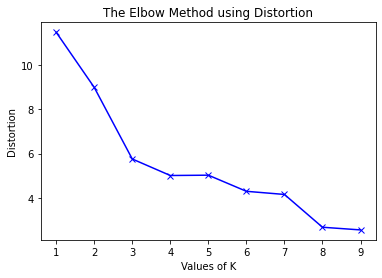

In [368]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

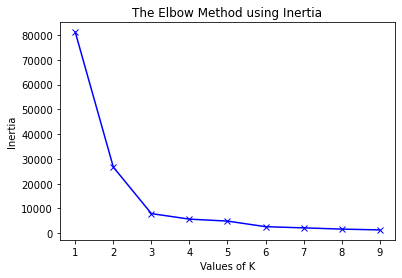

In [369]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [370]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X,sample_weight=df_1990_2['at'])
centers = kmeans.cluster_centers_

In [371]:
df_1990_2['label'] = kmeans.labels_

<ipython-input-371-63373cc9cd3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990_2['label'] = kmeans.labels_


In [372]:
for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '2'  

### 3. Manufacturing

In [373]:
df_1990_3 = df_1990[df_1990['ff12'] == 3]

In [374]:
X = []
for i in range(len(df_1990_3)):
    lat = df_1990_3.iloc[i,16]
    lon = df_1990_3.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [375]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1990_3['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

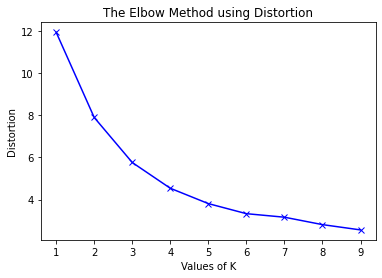

In [376]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

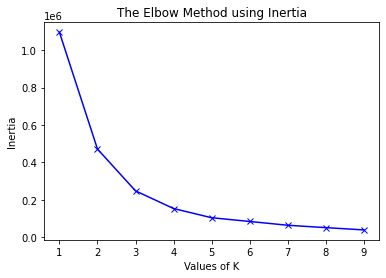

In [377]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [378]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X,sample_weight=df_1990_3['at'])
centers = kmeans.cluster_centers_

In [379]:
df_1990_3['label'] = kmeans.labels_

<ipython-input-379-c019d0f2d744>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990_3['label'] = kmeans.labels_


In [380]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '3'  

### 4. Energy

In [381]:
df_1990_4 = df_1990[df_1990['ff12'] == 4]


In [382]:
X = []
for i in range(len(df_1990_4)):
    lat = df_1990_4.iloc[i,16]
    lon = df_1990_4.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [383]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1990_4['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

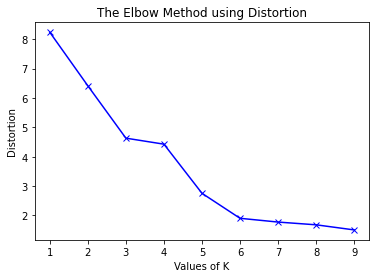

In [384]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

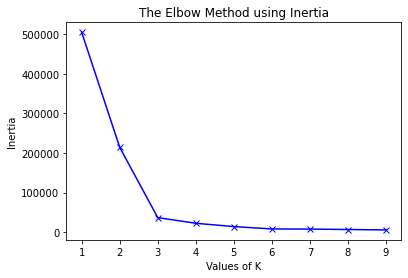

In [385]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [386]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X,sample_weight=df_1990_4['at'])
centers = kmeans.cluster_centers_

In [387]:
df_1990_4['label'] = kmeans.labels_

<ipython-input-387-c7f34898cdd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990_4['label'] = kmeans.labels_


In [388]:
for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '4'  

### 5. Chemistry

In [389]:


df_1990_5 = df_1990[df_1990['ff12'] == 5]

In [390]:
X = []
for i in range(len(df_1990_5)):
    lat = df_1990_5.iloc[i,16]
    lon = df_1990_5.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [391]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1990_5['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

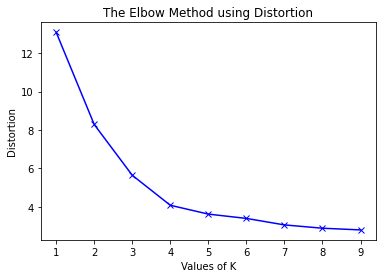

In [392]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

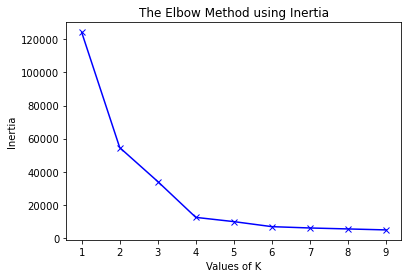

In [393]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [394]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X,sample_weight=df_1990_5['at'])
centers = kmeans.cluster_centers_

In [395]:
df_1990_5['label'] = kmeans.labels_

<ipython-input-395-9c1152081aa9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990_5['label'] = kmeans.labels_


In [396]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '5'  


### 6. Business Equipment

In [397]:
df_1990_6 = df_1990[df_1990['ff12'] == 6]

In [398]:
X = []
for i in range(len(df_1990_6)):
    lat = df_1990_6.iloc[i,16]
    lon = df_1990_6.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [399]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1990_6['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

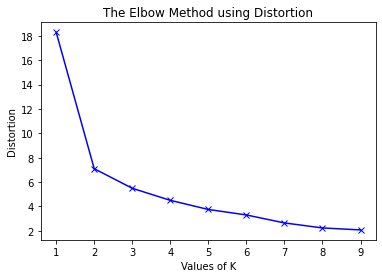

In [400]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

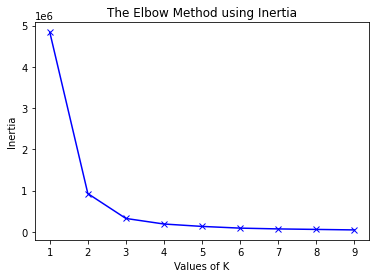

In [401]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [402]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X,sample_weight=df_1990_6['at'])
centers = kmeans.cluster_centers_

In [403]:
df_1990_6['label'] = kmeans.labels_

<ipython-input-403-d274376858cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990_6['label'] = kmeans.labels_


In [404]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '6'  

### 7. Telecom

In [405]:
df_1990_7 = df_1990[df_1990['ff12'] == 7]

In [406]:
X = []
for i in range(len(df_1990_7)):
    lat = df_1990_7.iloc[i,16]
    lon = df_1990_7.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [407]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1990_7['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

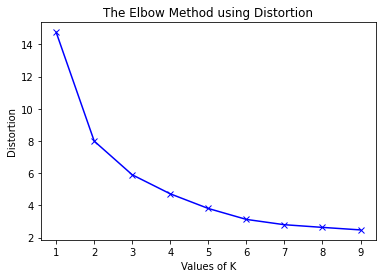

In [408]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

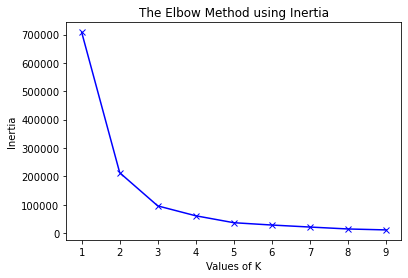

In [409]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [410]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X,sample_weight=df_1990_7['at'])
centers = kmeans.cluster_centers_

In [411]:
df_1990_7['label'] = kmeans.labels_

<ipython-input-411-e80607f3ae60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990_7['label'] = kmeans.labels_


In [412]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '7'  

### 8. Utilities

In [413]:
df_1990_8 = df_1990[df_1990['ff12'] == 8]


In [414]:
X = []
for i in range(len(df_1990_8)):
    lat = df_1990_8.iloc[i,16]
    lon = df_1990_8.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [415]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1990_8['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

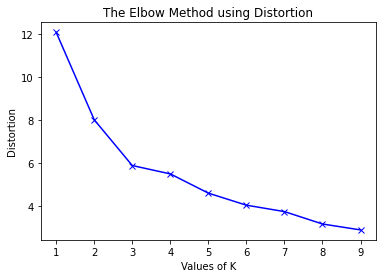

In [416]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

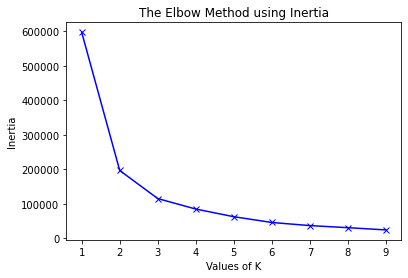

In [417]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [418]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X,sample_weight=df_1990_8['at'])
centers = kmeans.cluster_centers_

In [419]:
df_1990_8['label'] = kmeans.labels_

<ipython-input-419-fca02773efb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990_8['label'] = kmeans.labels_


In [420]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '8'  

### 9. Wholesale

In [421]:
df_1990_9 = df_1990[df_1990['ff12'] == 9]

In [422]:
X = []
for i in range(len(df_1990_9)):
    lat = df_1990_9.iloc[i,16]
    lon = df_1990_9.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [423]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1990_9['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

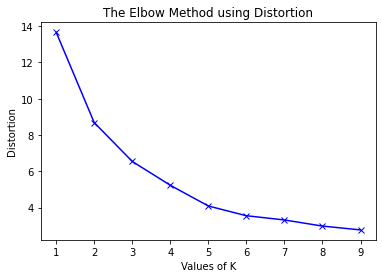

In [424]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

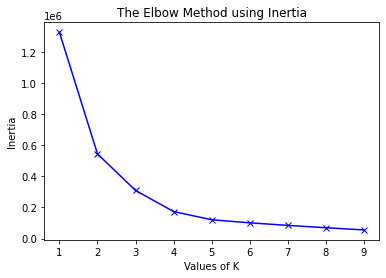

In [425]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [426]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X,sample_weight=df_1990_9['at'])
centers = kmeans.cluster_centers_

In [427]:
df_1990_9['label'] = kmeans.labels_

<ipython-input-427-8dc4e983c32a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990_9['label'] = kmeans.labels_


In [428]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '9'  

### 10. Healthcare

In [429]:
df_1990_10 = df_1990[df_1990['ff12'] == 10]

In [430]:
X = []
for i in range(len(df_1990_10)):
    lat = df_1990_10.iloc[i,16]
    lon = df_1990_10.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [431]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1990_10['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

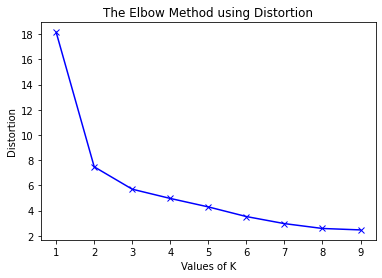

In [432]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

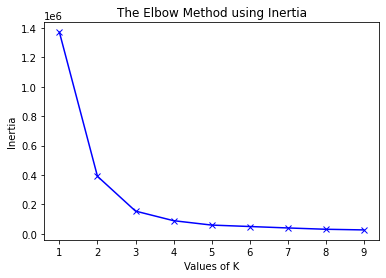

In [433]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [434]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X,sample_weight=df_1990_10['at'])
centers = kmeans.cluster_centers_

In [435]:
df_1990_10['label'] = kmeans.labels_

<ipython-input-435-64359c7f7ad3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990_10['label'] = kmeans.labels_


In [436]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '10'  

### 11. Finance

In [437]:
df_1990_11 = df_1990[df_1990['ff12'] == 11]

In [438]:
X = []
for i in range(len(df_1990_11)):
    lat = df_1990_11.iloc[i,16]
    lon = df_1990_11.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [439]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1990_11['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

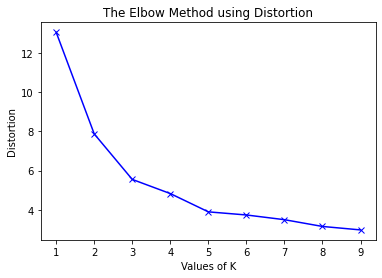

In [440]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

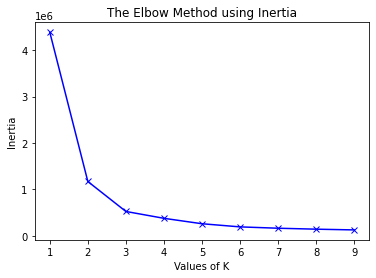

In [441]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [442]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X,sample_weight=df_1990_11['at'])
centers = kmeans.cluster_centers_

In [443]:
df_1990_11['label'] = kmeans.labels_

<ipython-input-443-85f33409fe05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990_11['label'] = kmeans.labels_


In [444]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '11'  

### 12. Others

In [445]:
df_1990_12 = df_1990[df_1990['ff12'] == 12]

In [446]:
X = []
for i in range(len(df_1990_12)):
    lat = df_1990_12.iloc[i,16]
    lon = df_1990_12.iloc[i,17]
    cor = [lon,lat]
    X.append(cor)
X = np.array(X)

In [447]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X,sample_weight=df_1990_12['at'])
  
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

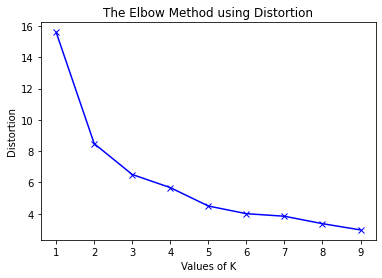

In [448]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

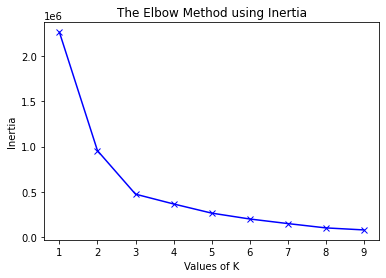

In [449]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [450]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X,sample_weight=df_1990_12['at'])
centers = kmeans.cluster_centers_

In [451]:
df_1990_12['label'] = kmeans.labels_

<ipython-input-451-db25322e7350>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990_12['label'] = kmeans.labels_


In [452]:

for i in centers:
    cluster_center.append(centers)
    i = i[0] #dict[long] = industry
    dict_ind[i] = '12'  

In [453]:
df_1990 = [df_1990_1, df_1990_2, df_1990_3,df_1990_4,df_1990_5,df_1990_6,df_1990_7,df_1990_8,df_1990_9,df_1990_10,df_1990_11,df_1990_12]
df_1990 = pd.concat(df_1990)
df_1990

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,at,emp,revt,costat,addzip,sic,state,ff12,latitude,longitude,label
283,1109,19901231,1990.0,INDL,C,D,STD,USD,2.127,0.039,3.971,I,33022,3944,FL,1,26.0134,-80.1442,0
284,1109,19911231,1991.0,INDL,C,D,STD,USD,2.626,0.039,4.324,I,33022,3944,FL,1,26.0134,-80.1442,0
285,1109,19921231,1992.0,INDL,C,D,STD,USD,2.979,0.035,4.952,I,33022,3944,FL,1,26.0134,-80.1442,0
286,1109,19931231,1993.0,INDL,C,D,STD,USD,3.307,0.030,4.076,I,33022,3944,FL,1,26.0134,-80.1442,0
287,1109,19941231,1994.0,INDL,C,D,STD,USD,3.438,0.035,4.603,I,33022,3944,FL,1,26.0134,-80.1442,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81131,147568,19991231,1999.0,INDL,C,D,STD,USD,776.096,4.100,739.136,I,47130,4400,IN,12,38.3078,-85.7359,2
81133,147571,19991231,1999.0,INDL,C,D,STD,USD,79.458,0.000,88.042,A,89135,7990,NV,12,36.1378,-115.3261,1
81134,147601,19991231,1999.0,INDL,C,D,STD,USD,24.994,0.000,37.397,I,26003,7990,WV,12,40.1027,-80.6476,3
81138,148259,20000430,1999.0,INDL,C,D,STD,USD,109.892,0.650,93.185,I,80422,7990,CO,12,39.8160,-105.4753,4


In [454]:
df_1990.to_csv("1990.csv", index = False)

In [455]:
lst = []
for i in cluster_center:
    for j in i:
        lst.append(j)
center_cluster_1990 = pd.DataFrame()
center_cluster_1990['long'] = [cor[0] for cor in lst]
center_cluster_1990['lati'] = [cor[1] for cor in lst]
industry = []
for long in center_cluster_1990['long']:
    ind = dict_ind[long]
    industry.append(ind)
center_cluster_1990['industry'] = industry

In [456]:
center_cluster_1990['year'] = '1990'
center_cluster_1990

,long,lati,industry,year
0,-82.734013,33.719754,1,1990
1,-119.670348,35.768841,1,1990
2,-88.877903,41.379541,1,1990
3,-76.328549,39.341667,1,1990
4,-97.647913,36.315386,1,1990
...,...,...,...,...
204,-92.357000,41.246309,12,1990
205,-118.200292,37.622715,12,1990
206,-82.631126,31.788788,12,1990
207,-77.081442,39.565844,12,1990


In [457]:
# import plotly
# tem = dict(
#     type = 'scattergeo',
#     locationmode = 'USA-states', 
#     mode = 'markers'
#     )

# data_1 = tem.copy()
# data_1['lon'] = center_cluster_1990[center_cluster_1990['industry']=='1']['long']
# data_1['lat'] = center_cluster_1990[center_cluster_1990['industry']=='1']['lati']
# data_1['marker'] = dict(color = 'red')
# data_1['name'] = 'Consumer NonDurables'

# data_2 = tem.copy()
# data_2['lon'] = center_cluster_1990[center_cluster_1990['industry']=='2']['long']
# data_2['lat'] = center_cluster_1990[center_cluster_1990['industry']=='2']['lati']
# data_2['marker'] = dict(color = 'brown')
# data_2['name'] = 'Consumer Durables'

# data_3 = tem.copy()
# data_3['lon'] = center_cluster_1990[center_cluster_1990['industry']=='3']['long']
# data_3['lat'] = center_cluster_1990[center_cluster_1990['industry']=='3']['lati']
# data_3['marker'] = dict(color = 'green')
# data_3['name'] = 'Manufacturing'

# data_4 = tem.copy()
# data_4['lon'] = center_cluster_1990[center_cluster_1990['industry']=='4']['long']
# data_4['lat'] = center_cluster_1990[center_cluster_1990['industry']=='4']['lati']
# data_4['marker'] = dict(color = 'yellow')
# data_4['name'] = 'Energy'

# data_5 = tem.copy()
# data_5['lon'] = center_cluster_1990[center_cluster_1990['industry']=='5']['long']
# data_5['lat'] = center_cluster_1990[center_cluster_1990['industry']=='5']['lati']
# data_5['marker'] = dict(color = 'violet')
# data_5['name'] = 'Chemistry'

# data_6 = tem.copy()
# data_6['lon'] = center_cluster_1990[center_cluster_1990['industry']=='6']['long']
# data_6['lat'] = center_cluster_1990[center_cluster_1990['industry']=='6']['lati']
# data_6['marker'] = dict(color = 'skyblue')
# data_6['name'] = 'Business Equipment'

# data_7 = tem.copy()
# data_7['lon'] = center_cluster_1990[center_cluster_1990['industry']=='7']['long']
# data_7['lat'] = center_cluster_1990[center_cluster_1990['industry']=='7']['lati']
# data_7['marker'] = dict(color = 'gray')
# data_7['name'] = 'Telecom'

# data_8 = tem.copy()
# data_8['lon'] = center_cluster_1990[center_cluster_1990['industry']=='8']['long']
# data_8['lat'] = center_cluster_1990[center_cluster_1990['industry']=='8']['lati']
# data_8['marker'] = dict(color = 'pink')
# data_8['name'] = 'Utilities'

# data_9 = tem.copy()
# data_9['lon'] = center_cluster_1990[center_cluster_1990['industry']=='9']['long']
# data_9['lat'] = center_cluster_1990[center_cluster_1990['industry']=='9']['lati']
# data_9['marker'] = dict(color = 'olive')
# data_9['name'] = 'Wholesale'

# data_10 = tem.copy()
# data_10['lon'] = center_cluster_1990[center_cluster_1990['industry']=='10']['long']
# data_10['lat'] = center_cluster_1990[center_cluster_1990['industry']=='10']['lati']
# data_10['marker'] = dict(color = 'orange')
# data_10['name'] = 'Healthcare'

# data_11 = tem.copy()
# data_11['lon'] = center_cluster_1990[center_cluster_1990['industry']=='11']['long']
# data_11['lat'] = center_cluster_1990[center_cluster_1990['industry']=='11']['lati']
# data_1['marker'] = dict(color = 'gold')
# data_11['name'] = 'Finance'

# data_12 = tem.copy()
# data_12['lon'] = center_cluster_1990[center_cluster_1990['industry']=='12']['long']
# data_12['lat'] = center_cluster_1990[center_cluster_1990['industry']=='12']['lati']
# data_12['marker'] = dict(color = 'yellowgreen')
# data_12['name'] = 'Others'

# layout = dict(
#         geo = dict(
#             scope = 'usa',
#             projection = dict(type='albers usa'),
#         ),
#     )

# fig = dict(data=[data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12], layout=layout)
# plotly.offline.plot(fig)